<a href="https://colab.research.google.com/github/Ksangi/NYC_Taxi_trip_Time_Prediction_Project/blob/main/NYC_Taxi_Trip_Time_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**

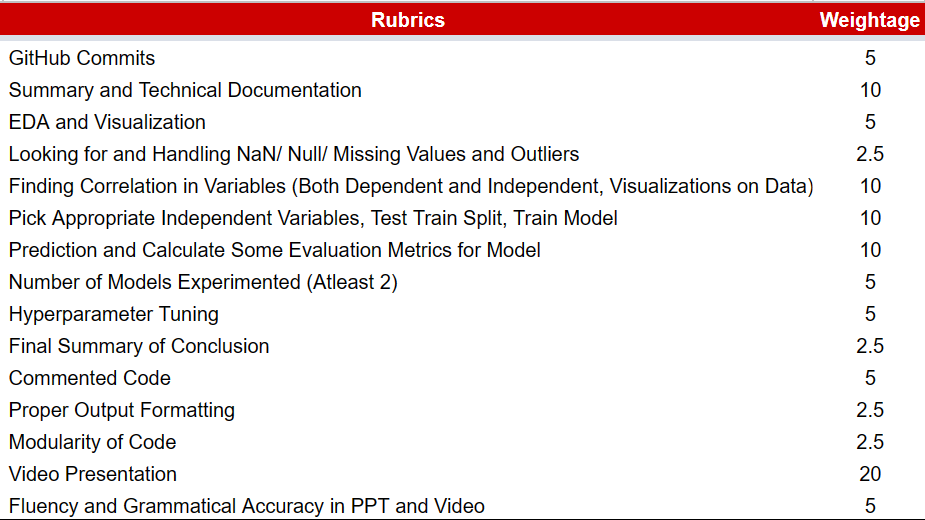

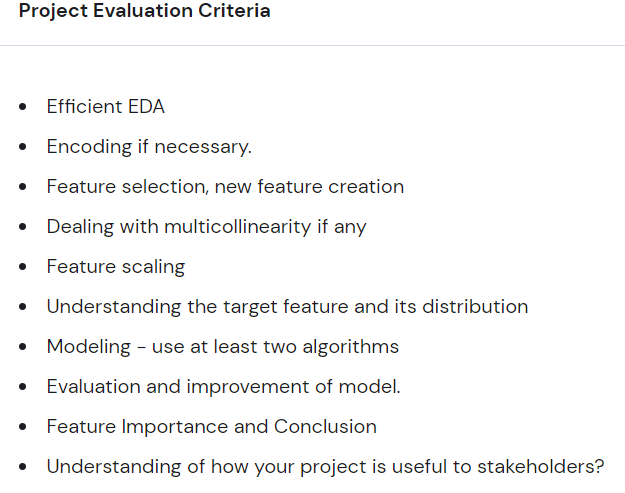

<h1> Task </h> 

Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables

<ul depth="0" class="list-disc my-4 w-11/12">
<li index="0" class="text-base list-inside py-1 listing w-11/12 text-justify">Efficient EDA</li>
<li index="1" class="text-base list-inside py-1 listing w-11/12 text-justify">Encoding if necessary.</li>
<li index="2" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature selection, new feature creation</li>
<li index="3" class="text-base list-inside py-1 listing w-11/12 text-justify">Dealing with multicollinearity if any</li>
<li index="4" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature scaling</li>
<li index="5" class="text-base list-inside py-1 listing w-11/12 text-justify">Understanding the target feature and its distribution</li>
<li index="6" class="text-base list-inside py-1 listing w-11/12 text-justify">Modeling - use at least two algorithms</li>
<li index="7" class="text-base list-inside py-1 listing w-11/12 text-justify">Evaluation and improvement of model.</li>
<li index="8" class="text-base list-inside py-1 listing w-11/12 text-justify">Feature Importance and Conclusion</li>
<li index="9" class="text-base list-inside py-1 listing w-11/12 text-justify">Understanding of how your project is useful to stakeholders?</li>
</ul>

<center> <img  src="https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png" width="700" height="500"> </center>

In [ ]:
# mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# reading data and creatinf DataFrame
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/Regression/NYC Taxi Data.csv')

# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
# get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


This dataset contains 14,58,644 observations and 11 columns
We observe that the pickup_datetime and dropoff_datetime is in object type, There it is needed to convert to datetime data type

In [ ]:
# top 5 observations
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# bottom 5 observations
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


id is unique for each trip so this column has no effect on trip duration prediction, Therefore it is better to drop this column.

In [ ]:
# check null values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

The dataset contains no null values

In [ ]:
# check duplicates values
data.duplicated().sum()

0

This dataset contains no duplicated values

In [ ]:
# get statistics of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [ ]:
# get statistics of non-numeric columns
data.describe(include='O').T

,count,unique,top,freq
id,1458644,1458644,id2875421,1
pickup_datetime,1458644,1380222,2016-03-04 08:07:34,5
dropoff_datetime,1458644,1380377,2016-02-19 19:25:04,5
store_and_fwd_flag,1458644,2,N,1450599


In [ ]:
# drop id column
data.drop(['id'], axis=1, inplace=True)
data.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


## **2.Data visulation**

###Chart-1

In [ ]:
def without_hue(ax, feature):
  '''To add percentage on top of bar plot drawn by seaborn '''
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

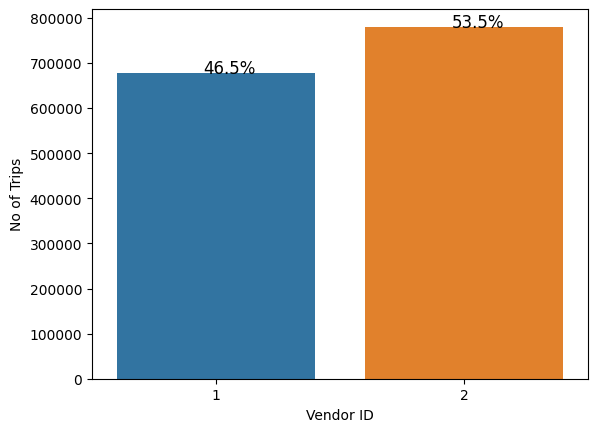

In [ ]:
ax=sns.countplot(data=data, x='vendor_id')
plt.xlabel('Vendor ID')
plt.ylabel('No of Trips')
without_hue(ax, data.vendor_id)

The above bar plot shows that Vendor 2 has got 7% more taxi trips than vendor 1. The difference is not much but it can help find why vendor 1 trips are low?
 

The numbers of taxi trip services provided by both service providers are almost same and equals to 50%

### Chart-2

Text(0, 0.5, 'No of Trips')

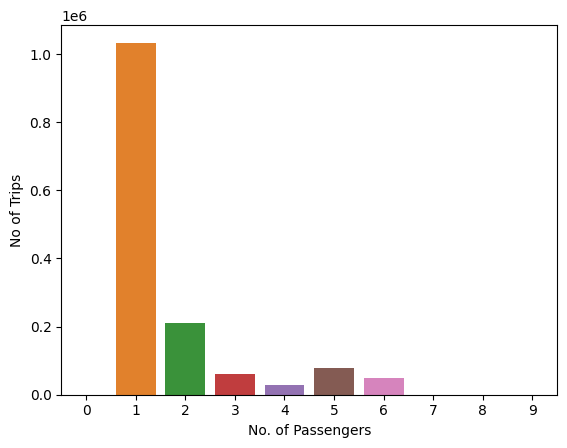

In [ ]:
ax=sns.countplot(data=data, x='passenger_count')
plt.xlabel('No. of Passengers')
plt.ylabel('No of Trips')


Most taxi trips carry one passengers and they rarely carry zero passengers or more than six.

### Chart-3

Text(0, 0.5, 'No of Trips')

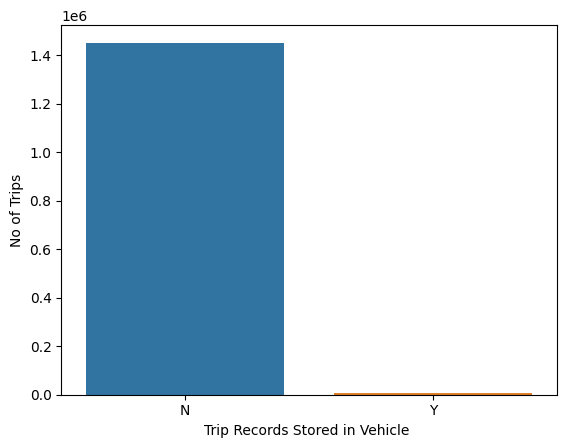

In [ ]:
ax=sns.countplot(data=data, x='store_and_fwd_flag')
plt.xlabel('Trip Records Stored in Vehicle ')
plt.ylabel('No of Trips')

Most of the trip records are held in vehicle memory.

### Chart-4

As plotiing location denstity plot off all location can be comutational expensive do taking 10,000 samples and ploting it.

In [ ]:
"""import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data = pd.DataFrame({
    'lat': lat[:1000000],
    'lon': lon[:1000000]
})

# Create a density map
fig = px.density_mapbox(data, lat='lat', lon='lon', radius=10, zoom=10,
                        mapbox_style="carto-positron", opacity=0.8)
# , width=10, height=10
fig.update_layout(title='Density of Pick Up Locations', width=1500, height=800)
fig.show()"""

In [ ]:
lat=data.sample(n=10000, random_state=42)['dropoff_latitude'].tolist()
lon=data.sample(n=10000, random_state=42)['dropoff_longitude'].tolist()
import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data_ = pd.DataFrame({
    'lat': lat,
    'lon': lon
})

# Create a density map
fig = px.density_mapbox(data_, lat='lat', lon='lon', radius=10, zoom=10,
                        mapbox_style="carto-positron", opacity=0.8)
# , width=10, height=10
fig.update_layout(title='Density of Drop Off Locations', width=1500, height=800)
fig.show()

### Chart-5

In [ ]:
lat=data.sample(n=10000, random_state=42)['pickup_latitude'].tolist()
lon=data.sample(n=10000, random_state=42)['pickup_longitude'].tolist()
import plotly.express as px

# Create a DataFrame with columns 'lat' and 'lon'
data_ = pd.DataFrame({
    'lat': lat,
    'lon': lon
})

# Create a density map
fig = px.density_mapbox(data_, lat='lat', lon='lon', radius=10, zoom=10,
                        mapbox_style="carto-positron", opacity=0.8)
# , width=10, height=10
fig.update_layout(title='Density of Pick Up Locations', width=1500, height=800)
fig.show()

### Chart-6

*   daytime vs taxi service frequency  





In [ ]:
# converting time to datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

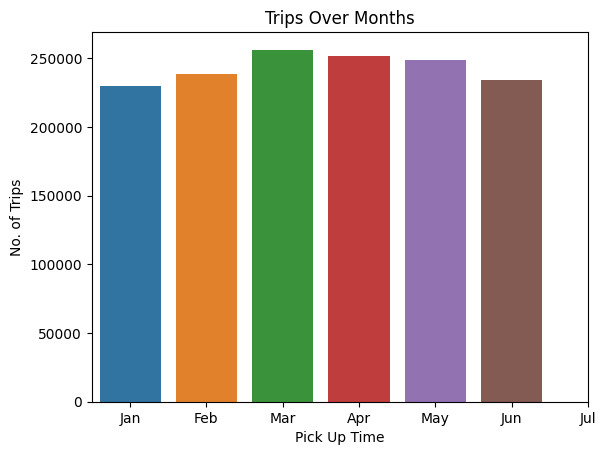

In [ ]:
# taxi trip frequency across months
ax=sns.countplot(x=data['pickup_datetime'].dt.month)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])  # set 4 tick locations
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"])
plt.xlabel('Pick Up Time')
plt.ylabel('No. of Trips')
plt.title('Trips Over Months')
plt.show()

### Chart-7

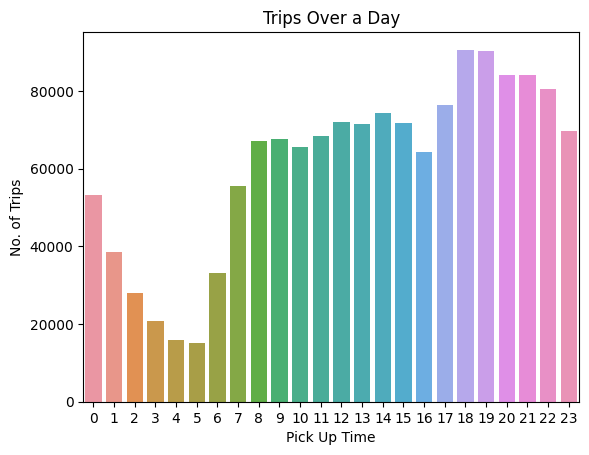

In [ ]:
sns.countplot(x=data['pickup_datetime'].dt.hour )
plt.xlabel('Pick Up Time')
plt.ylabel('No. of Trips')
plt.title('Trips Over a Day')
plt.show()

### Chart-8

1. mostly people travel in night 6pm to 12pm.
2. Traffic is just constant from 9am to 5pm. It may be because of office hours.

Datetime 
1. This data is for year 2016 olny.
2. It has just month from Jan to Jul

### Chart-9

Text(0, 0.5, 'No of Trips')

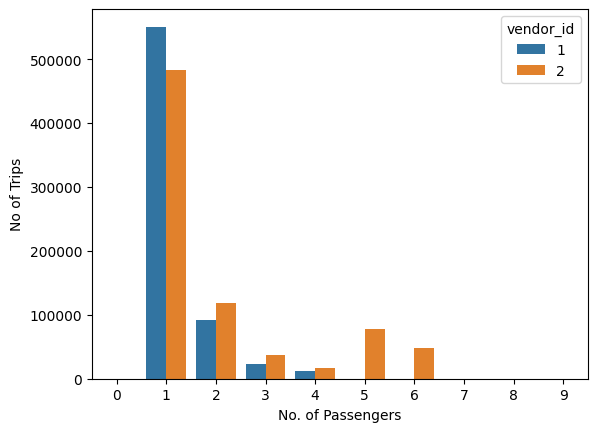

In [ ]:
ax=sns.countplot(data=data, x='passenger_count', hue='vendor_id')
plt.xlabel('No. of Passengers')
plt.ylabel('No of Trips')

Vendor 1 is on top in carrying single passengers whereas vendor 2 is on top in carrying more than 2 passengers. It may be because passengers prefer share taxi trip from vendor 2

gurgaon
sec53
sec30
3rd 19thjune
Mansi

#3.Feature Enginneering

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/Regression/NYC Taxi Data.csv')

In [ ]:
df=data.copy()

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 1)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.004518623793102083

In [ ]:
r2_score(y_train, y_train_pred)

0.0018616876013415329

<AxesSubplot:>

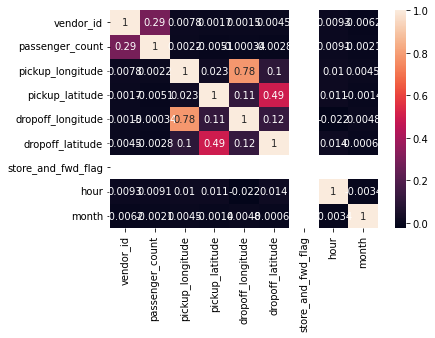

In [ ]:
corr=X.corr()
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def my_train_test_split(df, scaler_='StandardScaler'):
  y=df['trip_duration']
  X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  if scaler_=='MinMax':
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  else:
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

# def performance(X_train, X_test, y_train, y_test):
#     mse_train=mean_squared_error(y_train, model.predict(X_train))
#     mse_test=mean_squared_error(y_test, model.predict(X_test))
#     r2_train=r2_score(y_train, model.predict(X_train))
#     r2_test=r2_score(y_test, model.predict(X_test))  


#     print(f"RMSE of train dataset", mse_train)
#     print(f"RMSE of test dataset", mse_test)
#     print(f"RMSE of train dataset", r2_test)
#     print(f"RMSE of test dataset", r2_train)

def model(algo):
  X_train, X_test, y_train, y_test=my_train_test_split(df)
  if algo=='Linear Regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
  elif algo=='Decision Tree':
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

  elif algo=='KNN':
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)

  elif algo=='SVR':
    model = SVR()
    model.fit(X_train, y_train)

  else:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
  

  mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
  mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
  r2_train=r2_score(y_train, model.predict(X_train))
  r2_test=r2_score(y_test, model.predict(X_test))  


  print(f"RMSE of train dataset", mse_train)
  print(f"RMSE of test dataset", mse_test)
  print(f"R2_score of train dataset", r2_test)
  print(f"R2_score of test dataset", r2_train)



In [ ]:
model_name=['Linear Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest']

In [ ]:
y=df['trip_duration']
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_train)

array([508.08946439, 542.04113804, 553.93951942, ..., 537.0196459 ,
       552.05368964, 536.41979955])

In [ ]:
model('Linear Regression')

In [ ]:
from datetime import datetime
datetime.now()

datetime.datetime(2023, 3, 29, 17, 15, 43, 830180)

In [ ]:
for algorithm in model_name:
  start_time=datetime.now()
  print(algorithm)
  model(algorithm)
  print(f"Time taken: {datetime.now()-start_time}3")

Linear Regression
RMSE of train dataset 256.6990553557813
RMSE of test dataset 257.1466260876857
R2_score of train dataset 0.007569386220805274
R2_score of test dataset 0.010006881777723686
Time taken: 0:00:01.9209613
Decision Tree
RMSE of train dataset 1.426462834301505
RMSE of test dataset 212.51819485955346
R2_score of train dataset 0.3221544827978198
R2_score of test dataset 0.9999694293582009
Time taken: 0:00:17.1488673
KNN
RMSE of train dataset 148.60871186699345
RMSE of test dataset 183.34247815142513
R2_score of train dataset 0.4954959162596825
R2_score of test dataset 0.6682032144829018
Time taken: 0:15:09.2645193
SVM
RMSE of train dataset 55.86632621588951
RMSE of test dataset 149.66907087031413
R2_score of train dataset 0.6637962007612421
R2_score of test dataset 0.9531096082967843
Time taken: 0:18:30.6133773
Random Forest
RMSE of train dataset 55.84797290940713
RMSE of test dataset 149.66265406436273
R2_score of train dataset 0.6638250284713476
R2_score of test dataset 0.95

#4.Outlier treatment

In [ ]:
df=data.copy()
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 1)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

In [ ]:
# Box plot
numeric_columns=[c for c in df.columns if c not in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']]
numeric_columns

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration',
 'hour',
 'month']

before (1458644, 10)


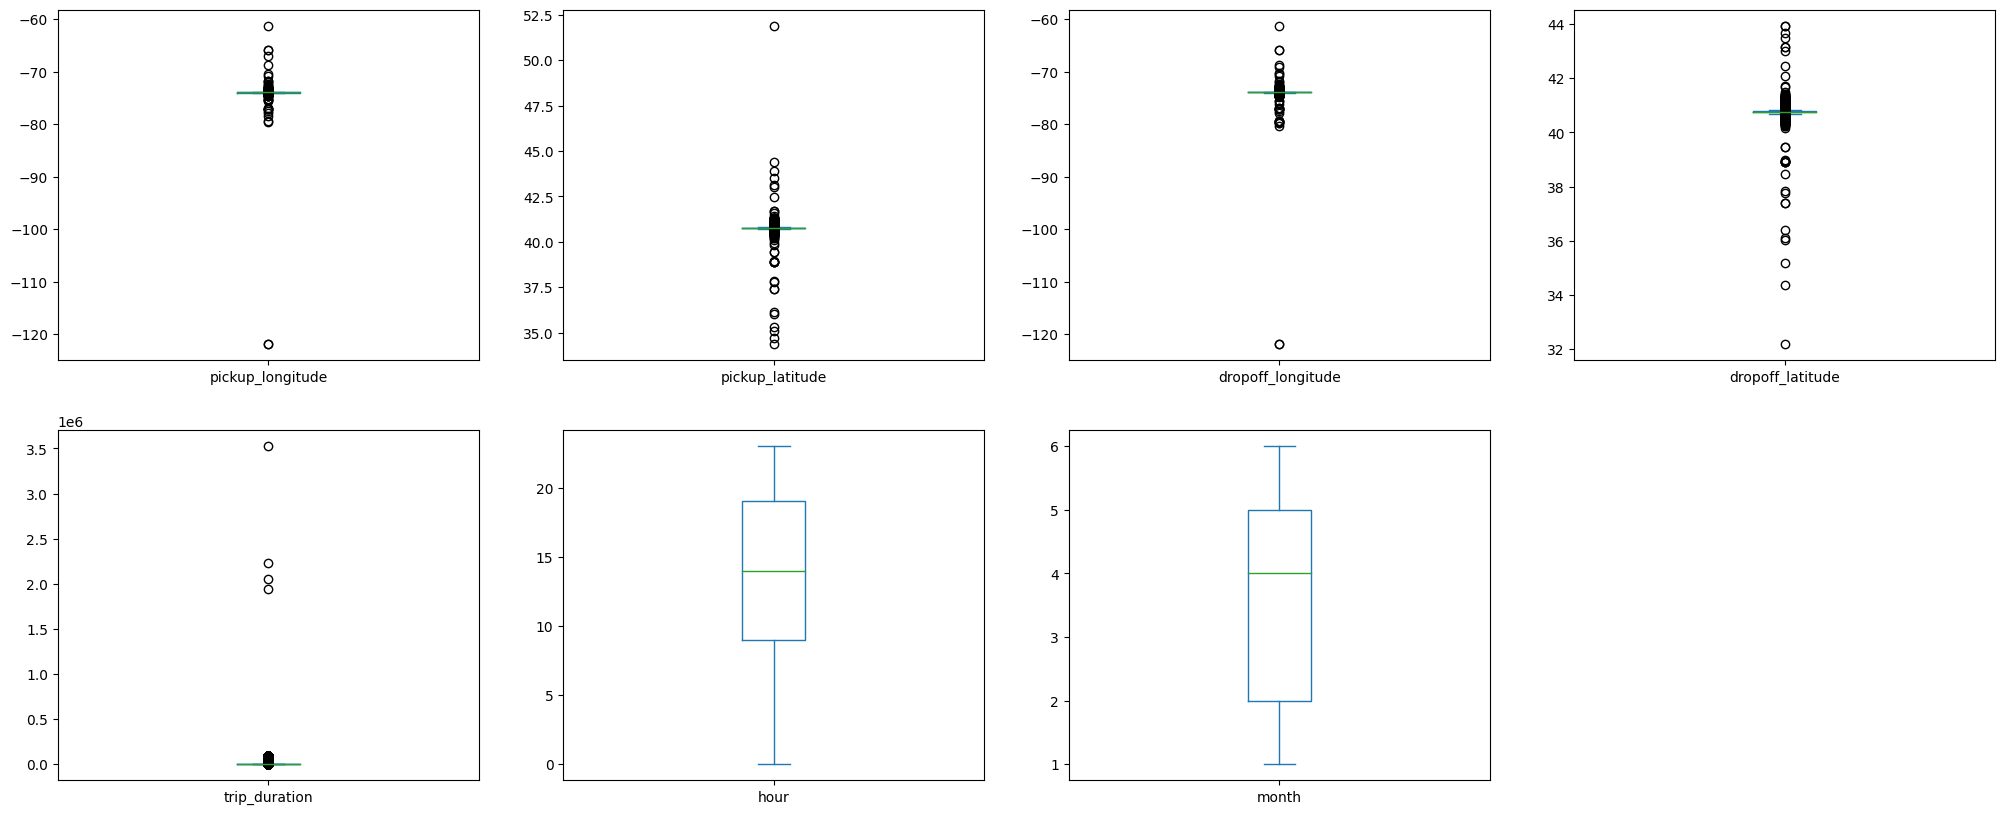

In [ ]:
plt.figure(figsize=(25,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='box')
print(f"before {df.shape}")

before (1161088, 10)


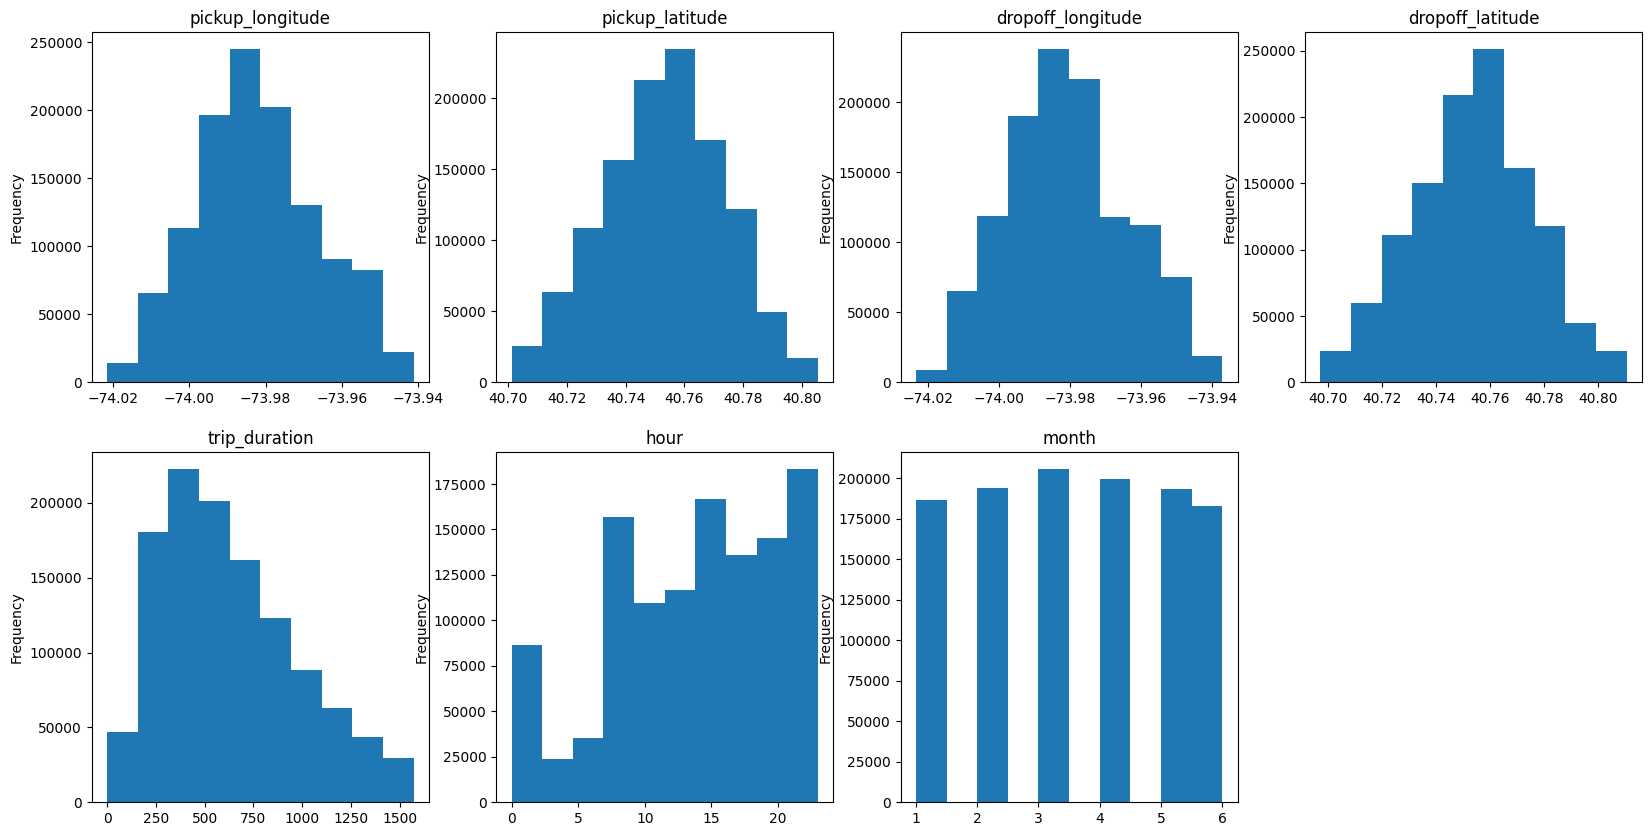

In [ ]:
plt.figure(figsize=(20,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='hist')
  plt.title(columns)
print(f"before {df.shape}")

In [ ]:
for i, column in enumerate(numeric_columns):
  IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
  UL=df[column].quantile(0.75)+IQR*1.5
  LL=df[column].quantile(0.25)-IQR*1.5
  df.drop(df[(df[column]>=UL)|(df[column]<=LL)].index, inplace=True)

In [ ]:
# SD on all

for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-2.5) | (2.5<df[f'{column}+_cleaned'])].index, inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)
df.shape[0]

1161647

before (1161647, 10)


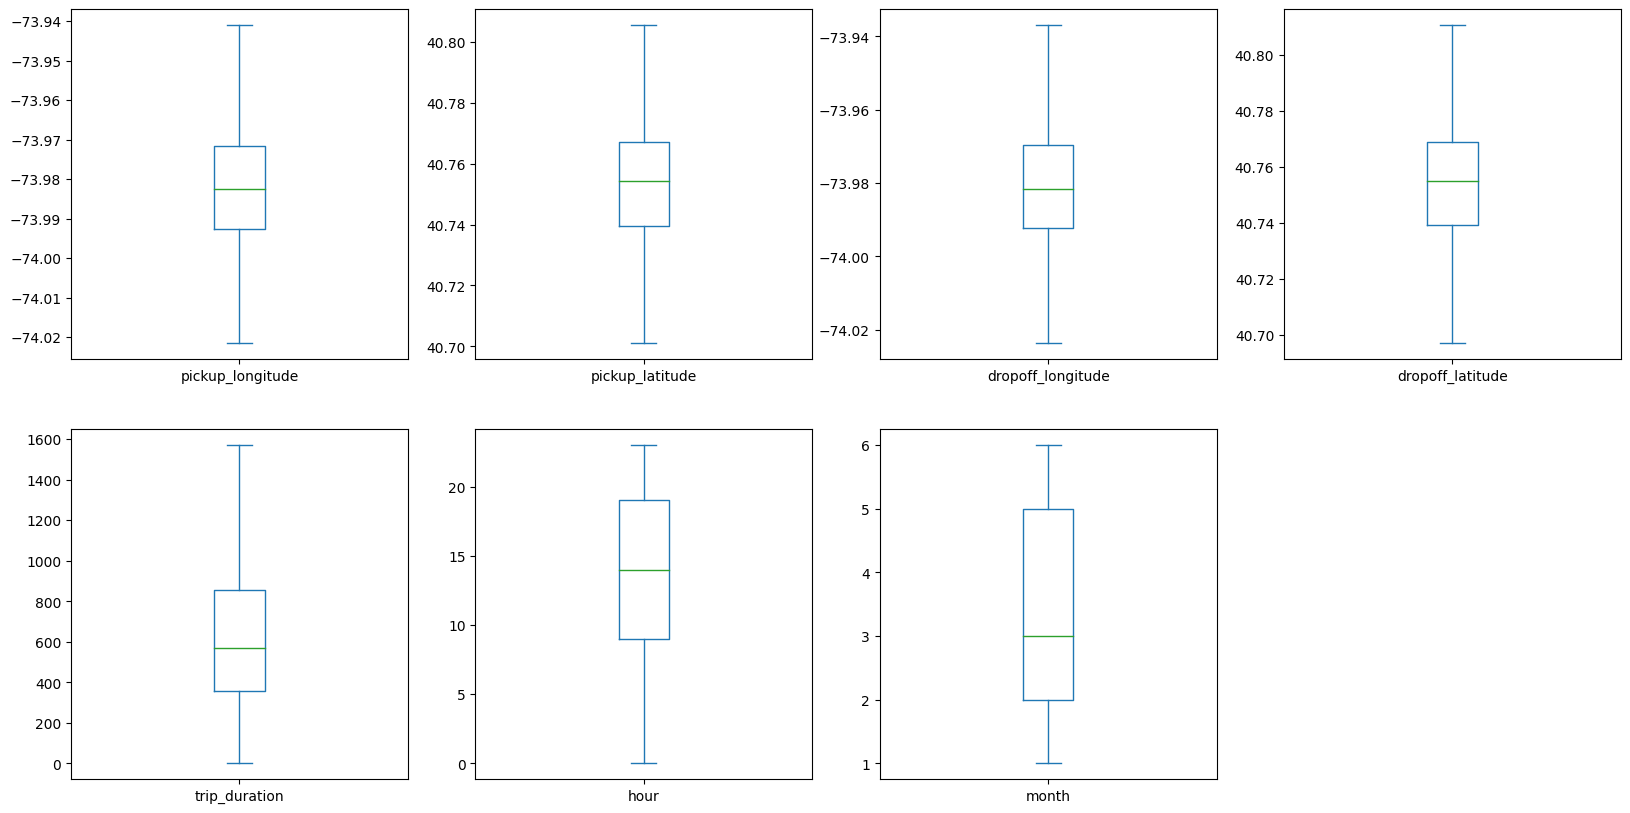

In [ ]:
plt.figure(figsize=(20,10))
for i, columns in enumerate(numeric_columns):
  plt.subplot(2,4, i+1)
  df[columns].plot(kind='box')
print(f"before {df.shape}")

In [ ]:
final_df=df.copy()

#5.Model building

As dataset is very big so, we will take sample of it to check which algorithms works best then  finetune and finally train with entire dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def my_train_test_split(df, scaler_='StandardScaler'):
  df=df.copy()
  df.sample(10000)
  y=df['trip_duration']
  X=df[[c for c in df.columns.tolist() if c!='trip_duration']]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  if scaler_=='MinMax':
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  else:
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

# def performance(X_train, X_test, y_train, y_test):
#     mse_train=mean_squared_error(y_train, model.predict(X_train))
#     mse_test=mean_squared_error(y_test, model.predict(X_test))
#     r2_train=r2_score(y_train, model.predict(X_train))
#     r2_test=r2_score(y_test, model.predict(X_test))  


#     print(f"RMSE of train dataset", mse_train)
#     print(f"RMSE of test dataset", mse_test)
#     print(f"RMSE of train dataset", r2_test)
#     print(f"RMSE of test dataset", r2_train)

def model(algo):
  X_train, X_test, y_train, y_test=my_train_test_split(df)
  if algo=='Linear Regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
  elif algo=='Decision Tree':
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

  elif algo=='KNN':
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)

  elif algo=='SVR':
    model = SVR()
    model.fit(X_train, y_train)

  else:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
  

  mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
  mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
  r2_train=r2_score(y_train, model.predict(X_train))
  r2_test=r2_score(y_test, model.predict(X_test))  


  print(f"RMSE of train dataset", mse_train)
  print(f"RMSE of test dataset", mse_test)
  print(f"R2_score of train dataset", r2_test)
  print(f"R2_score of test dataset", r2_train)



In [ ]:
model_name=['Linear Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest']

In [ ]:
for algorithm in model_name:
  start_time=datetime.now()
  print(algorithm)
  model(algorithm)
  print(f"Time taken: {datetime.now()-start_time}3")

Linear Regression
RMSE of train dataset 342.2824278660138
RMSE of test dataset 342.0022079978817
R2_score of train dataset 0.017422770379914798
R2_score of test dataset 0.016886899006359868
Time taken: 0:00:01.2146253
Decision Tree
RMSE of train dataset 1.0249614141017533
RMSE of test dataset 276.831122727083
R2_score of train dataset 0.35621818664865823
R2_score of test dataset 0.9999911844521276
Time taken: 0:00:16.2473763
KNN
RMSE of train dataset 180.47758557822996
RMSE of test dataset 221.89064342901773
R2_score of train dataset 0.5863939766997097
R2_score of test dataset 0.7266740787378236
Time taken: 0:27:07.4205603
SVM
RMSE of train dataset 72.85696254203434
RMSE of test dataset 194.62522682628347
R2_score of train dataset 0.6817948976784651
R2_score of test dataset 0.9554573143942908
Time taken: 0:19:47.0440043
Random Forest
RMSE of train dataset 72.84534035064429
RMSE of test dataset 194.65115478318754
R2_score of train dataset 0.6817101095153524
R2_score of test dataset 0.95

#6.Hyperparameter tuning

## Random Forest

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Default model
# without log transformation

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df=df.sample(10000, random_state=42)

y=df['trip_duration']

# y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

start=datetime.now()
print('.........Training.......\n')
model = RandomForestRegressor()
model.fit(X_train, y_train)

print('Training time', datetime.now()-start)

print('\n')

mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

.........Training.......

Training time 0:00:08.472304


RMSE of train dataset 86.59787801219083
RMSE of test dataset 225.74685838101936
R2_score of train dataset 0.9386335125701347
R2_score of test dataset 0.5736003760057313


In [ ]:
# Default model
# with log transformation

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df=df.sample(10000, random_state=42)

y=df['trip_duration']

y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

start=datetime.now()
print('.........Training.......\n')
model = RandomForestRegressor()
model.fit(X_train, y_train)

print('Training time', datetime.now()-start)

print('\n')

mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

.........Training.......

Training time 0:00:08.244061


RMSE of train dataset 0.16996225102870763
RMSE of test dataset 0.466695219273431
R2_score of train dataset 0.9319113690093473
R2_score of test dataset 0.5162214971867402


## Tuning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Default model
# with log transformation

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df=df.sample(10000, random_state=42)

y=df['trip_duration']

# y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

start=datetime.now()
print('.........Training.......\n')
model = RandomForestRegressor(max_depth=80, min_samples_leaf=2,
                      n_estimators=500)
model.fit(X_train, y_train)

print('Training time', datetime.now()-start)

print('\n')

mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

.........Training.......

Training time 0:00:23.830707


RMSE of train dataset 104.45236329360061
RMSE of test dataset 231.11053677367207
R2_score of train dataset 0.9099736156195126
R2_score of test dataset 0.5618144993288705


In [ ]:
# Hyperparameter tuning
n_estimators = [20,50,80]+[int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = [2,3,4,5,6,7,8,9]
max_depth = [2,5,10,20,30,40,50,80]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }

In [ ]:
# Default model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df=df.sample(10000, random_state=42)

y=df['trip_duration']

# y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

rf=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,  cv = 3, verbose=2, random_state=42)
# Fit
rf_random.fit(X_train, y_train)

# start=datetime.now()
# print('.........Training.......\n')
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# print('Training time', datetime.now()-start)

# print('\n')

# mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
# mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
# r2_train=r2_score(y_train, model.predict(X_train))
# r2_test=r2_score(y_test, model.predict(X_test))  


# print(f"RMSE of train dataset", mse_train)
# print(f"RMSE of test dataset", mse_test)
# print(f"R2_score of train dataset", r2_train)
# print(f"R2_score of test dataset", r2_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=80, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.8s
[CV] END max_depth=80, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END max_depth=80, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=2, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END max_depth=2, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END max_depth=2, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END max_depth=40, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  16.9s
[CV] END max_depth=40, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  19.0s
[CV] END 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 5, 10, 20, 30, 40, 50,
                                                      80],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 50, 80, 100, 200,
                                                         300, 400, 500, 600,
                                                         700, 800, 900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=40, max_features=6, min_samples_leaf=2,
                      n_estimators=200)

In [ ]:
# Default model
# with log transformation

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


y=df['trip_duration']

# y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

start=datetime.now()
print('.........Training.......\n')
model = RandomForestRegressor(max_depth=40, max_features=6, min_samples_leaf=2,
                      n_estimators=200)
model.fit(X_train, y_train)

print('Training time', datetime.now()-start)

print('\n')

mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

.........Training.......

Training time 0:20:22.419607


RMSE of train dataset 94.2172457133349
RMSE of test dataset 191.65423326336483
R2_score of train dataset 0.9255104956921231
R2_score of test dataset 0.6914356783390676


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## SVR

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Captstone project/Regression/NYC Taxi Data.csv')

In [ ]:
df=data.copy()

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 0)

# creating  hour and month column
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

#Droping unnecessary columns
df.drop(['dropoff_datetime','pickup_datetime','id'], axis=1, inplace=True)

print('No of observation before outlier treatment of trip_duration', df.shape[0])
IQR=df['trip_duration'].quantile(0.75)-df['trip_duration'].quantile(0.75)
UL=df['trip_duration'].quantile(0.75)+IQR*1.5
df.drop(df[df.trip_duration>UL].index, inplace=True)

print('No of observation after outlier treatment of trip_duration', df.shape[0])
print('\n')
print('No of observation before outlier treatment of other features', df.shape[0])

numeric_columns=[c for c in df.columns if c not in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']]

for i, column in enumerate(numeric_columns):
  mean = np.mean(df[column])
  std = np.std(df[column])
  df[f'{column}+_cleaned'] = df[column].apply(lambda x: (x-mean)/std)
  df.drop(index=df.loc[(df[f'{column}+_cleaned']<-3) | (3<df[f'{column}+_cleaned'])].index.to_list(), inplace=True)
  df.drop(columns=[f'{column}+_cleaned'], inplace=True)

print('No of observation after outlier treatment of other features', df.shape[0])

No of observation before outlier treatment of trip_duration 1458644
No of observation after outlier treatment of trip_duration 1094153


No of observation before outlier treatment of other features 1094153
No of observation after outlier treatment of other features 1061600


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df=df.sample(10000, random_state=42)
y=df['trip_duration']
# lst=['linear', 'rbf', 'poly', 'sigmoid']
y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

start=datetime.now()
print('.........Training.......\n')
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print('Training time', datetime.now()-start)

print('\n')

mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

.........Training.......

Training time 0:00:01.607115


RMSE of train dataset 0.45810009878307856
RMSE of test dataset 0.5014703980980871
R2_score of train dataset 0.5350674945621943
R2_score of test dataset 0.4774389348644509


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

df=df.sample(10000, random_state=42)
y=df['trip_duration']
y=np.log(y)
X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


parameters = {'C':[1,5,10,20,50,80,100,150,200,300]}
svc = svm.SVR()
clf = GridSearchCV(svc, parameters, cv=3)
clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
rf_random.best_score_

0.4989043057916292

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=80, max_features='auto', min_samples_leaf=2,
                      n_estimators=500)

In [ ]:
r2_score(y_train, rf_random.predict(X_train))


0.9009533328062627

In [ ]:
r2_score(y_test, 
         rf_random.predict(X_test))  

0.5862858229161296

##GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

df=df.sample(10000, random_state=42)
y=df['trip_duration']

X=df[[c for c in df.columns.tolist() if c!='trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


# parameters = {'C':[1,5,10,20,50,80,100,150,200,300]}
model = GradientBoostingRegressor()
# clf = GridSearchCV(svc, parameters, cv=3)
model.fit(X_train, y_train)
mse_train=mean_squared_error(y_train, model.predict(X_train), squared=False)
mse_test=mean_squared_error(y_test, model.predict(X_test), squared=False)
r2_train=r2_score(y_train, model.predict(X_train))
r2_test=r2_score(y_test, model.predict(X_test))  


print(f"RMSE of train dataset", mse_train)
print(f"RMSE of test dataset", mse_test)
print(f"R2_score of train dataset", r2_train)
print(f"R2_score of test dataset", r2_test)

RMSE of train dataset 247.64719715545127
RMSE of test dataset 264.4827381559473
R2_score of train dataset 0.4807059498702254
R2_score of test dataset 0.40796378057012816
